# Endemo 2 - Useful Energy Demand Model Rework

## Create Input Manager

In [1]:
from endemo import Endemo

model_instance = Endemo()
model_instance.read_input()
model_instance.write_debug_output()
model_instance.write_output()

# TODO: frankreich nuts2 überschneidungen lösen


{'DK04', 'FR10', 'HU32', 'ITI4', 'EL53', 'DEA1', 'PT11', 'UKE2', 'FRJ1', 'CZ02', 'EL42', 'DE80', 'BE21', 'UKI3', 'UKD7', 'FRC2', 'PL22', 'FRM0', 'DE22', 'ITH5', 'UKF3', 'ITG2', 'EL51', 'AT34', 'ME00', 'FRF1', 'KO01', 'FRD2', 'EL65', 'LI00', 'FRC1', 'FRG0', 'ITF5', 'FRF2', 'ITH1', 'NL32', 'UKI5', 'RS12', 'AT31', 'FRK1', 'UKJ2', 'NL22', 'PL42', 'PL82', 'UKJ3', 'ES63', 'ES52', 'UKJ1', 'DE11', 'PL52', 'RO11', 'UKM9', 'UKK4', 'NL31', 'MK00', 'ES51', 'FRI2', 'LU00', 'RS22', 'AT13', 'BE24', 'CZ05', 'DED5', 'ES11', 'NL34', 'SI03', 'PL84', 'FRY3', 'FRJ2', 'FRK2', 'CY00', 'UKL2', 'RO21', 'DE27', 'ES22', 'ITF2', 'UKH2', 'NL42', 'PL41', 'ITC1', 'DE25', 'AL01', 'EE00', 'AT33', 'IS00', 'CH01', 'CZ03', 'ITF1', 'ES24', 'DE71', 'NL23', 'ITI3', 'ES13', 'ES23', 'HU21', 'UKI4', 'NL33', 'UKJ4', 'FRE1', 'EL54', 'EL64', 'SE22', 'EL63', 'PL43', 'RO32', 'RS21', 'DEF0', 'AT22', 'FI19', 'BG31', 'SE11', 'UKG3', 'UKH3', 'HU22', 'LT01', 'HU23', 'BE33', 'DEA2', 'FRE2', 'NO06', 'NO05', 'EL41', 'RO22', 'DE40', 'PL21',

C:\Users\Chris\anaconda3\envs\endemo2\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Chris\anaconda3\envs\endemo2\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Check if settings were read correctly

In [2]:
# general settings
gs = model_instance.input_manager.ctrl.general_settings
print("Forecast year: " + str(gs.target_year))
print("Active sectors: " + str(gs.get_active_sectors()))
# print("Population Forecast: " + input_manager.ctrl.general_settings.population_forecast)
#print("Timeseries Forecast: " + ...)
# nuts ...
# world
# nuts2 classification
# graphical output
# calculate final energy demand

Forecast year: 2018
Active sectors: ['industry', 'households', 'transport', 'commertial, trade, services']


In [3]:
print("Active Countries: \n" + str(gs.active_countries))

Active Countries: 
0                    Belgium
1                   Bulgaria
2                    Czechia
3                    Denmark
4                    Germany
5                    Ireland
6                     Greece
7                      Spain
8                     France
9                    Croatia
10                     Italy
11                    Latvia
12                Luxembourg
13                   Hungary
14               Netherlands
15                   Austria
16                    Poland
17                  Portugal
18                   Romania
19                  Slovenia
20                  Slovakia
21                   Finland
22                    Sweden
23            United Kingdom
24                    Norway
25               Switzerland
26                Montenegro
27           North Macedonia
28                   Albania
29                    Serbia
30    Bosnia and Herzegovina
31                   Iceland
32                 Lithuania
33                   Est

In [4]:
# industry settings
inds = model_instance.input_manager.ctrl.industry_settings
print("Forecast method: " + str(inds.forecast_method))
# print("Timetrendmodel for u-shape")
print("Calculated per capita: " + str(inds.production_quantity_calc_per_capita))
print("Calc Specific Energy Requirements: " + str(inds.trend_calc_for_spec))
print("H2 subst of heat: " + str(inds.h2_subst_of_heat))
# print(nuts2...)
print("Skip years: " + str(inds.skip_years))
print("Last available year (excluding): " + str(inds.last_available_year))

Forecast method: ForecastMethod.LINEAR
Calculated per capita: True
Calc Specific Energy Requirements: True
H2 subst of heat: False
Skip years: [2009]
Last available year (excluding): 2019


## Generate output

### Gdp Prognosis Output

### Amount Prognosis Output

### Specific Consumption Prognosis Output

### Demand Prognosis Output

## Test Utility functions
### Test Regression

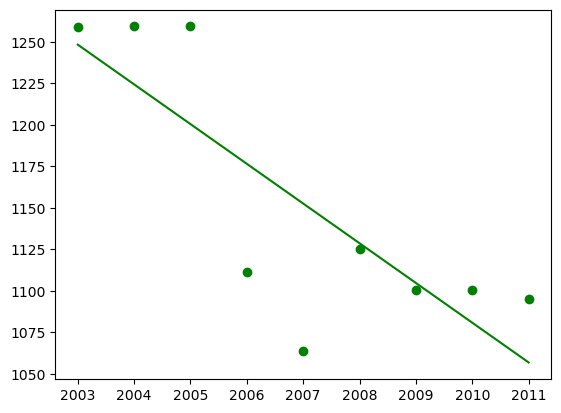

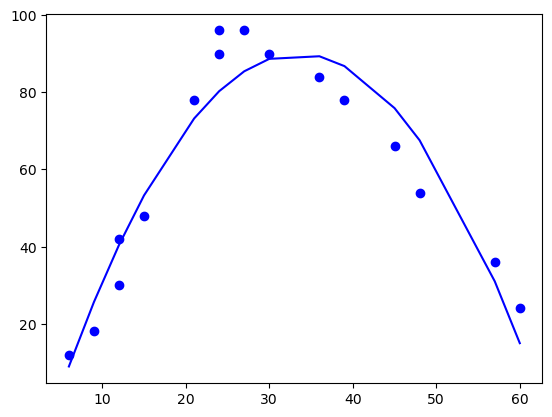

(-30.25286763906007, 7.173061390898329, -0.10698871880667692)

In [5]:
import utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [6]:
import numpy as np
import math
import utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_nan_and_inf(data)

[(6.0, 12.0),
 (12.0, 42.0),
 (15.0, 48.0),
 (21.0, 78.0),
 (24.0, 90.0),
 (24.0, 96.0),
 (27.0, 96.0),
 (30.0, 90.0),
 (36.0, 84.0),
 (39.0, 78.0),
 (45.0, 66.0),
 (48.0, 54.0),
 (57.0, 36.0),
 (60.0, 24.0)]

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [7]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


[(200, 2000), (300, 3000), (500, 5000)]
[(200, 2000), (300, 3000), (500, 5000)]


C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\utility.py:202: UserWarning: Are you sure, that your data on x axis is not ascending?
  warnings.warn("Are you sure, that your data on x axis is not ascending?")


### Zip on X explained

In [8]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(list(uty.zip_on_x(a, b)))

[((2, 200), (2, 2000)), ((3, 300), (3, 3000)), ((5, 500), (5, 5000))]


In [9]:
import utility as uty

amount = [(1998, 10), (2001, 12), (2003, 11), (2006, 13)]
population = [(2000, 10000), (2001, 11000), (2002, 12000), (2003, 13000), (2004, 14000), (2005, 14000), (2006, 15000)]
gdp = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]

zip_amount_pop = list(uty.zip_on_x(amount, population))

print("zipped amount & population: " + str(zip_amount_pop))
print("Transformed amount to per capita: " + str(list(map(lambda arg: (arg[0][0], arg[0][1] / arg[1][1]), zip_amount_pop))))

zipped amount & population: [((2001, 12), (2001, 11000)), ((2003, 11), (2003, 13000)), ((2006, 13), (2006, 15000))]
Transformed amount to per capita: [(2001, 0.001090909090909091), (2003, 0.0008461538461538462), (2006, 0.0008666666666666666)]
